<a href="https://colab.research.google.com/github/DariaLukyanenko/breast_cancer/blob/main/breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/breast_cancer_wisconsin.csv -O breast_cancer_wisconsin.csv 2> /dev/null

In [ ]:
df = pd.read_csv('breast_cancer_wisconsin.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

целевая переменная

In [ ]:
y = df['diagnosis'].map({'B': 0, 'M': 1})
y.value_counts(normalize=True)#пропорции

,proportion
diagnosis,
0,0.627417
1,0.372583


признаки

In [ ]:
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
!pip install -q missingno

<Axes: >

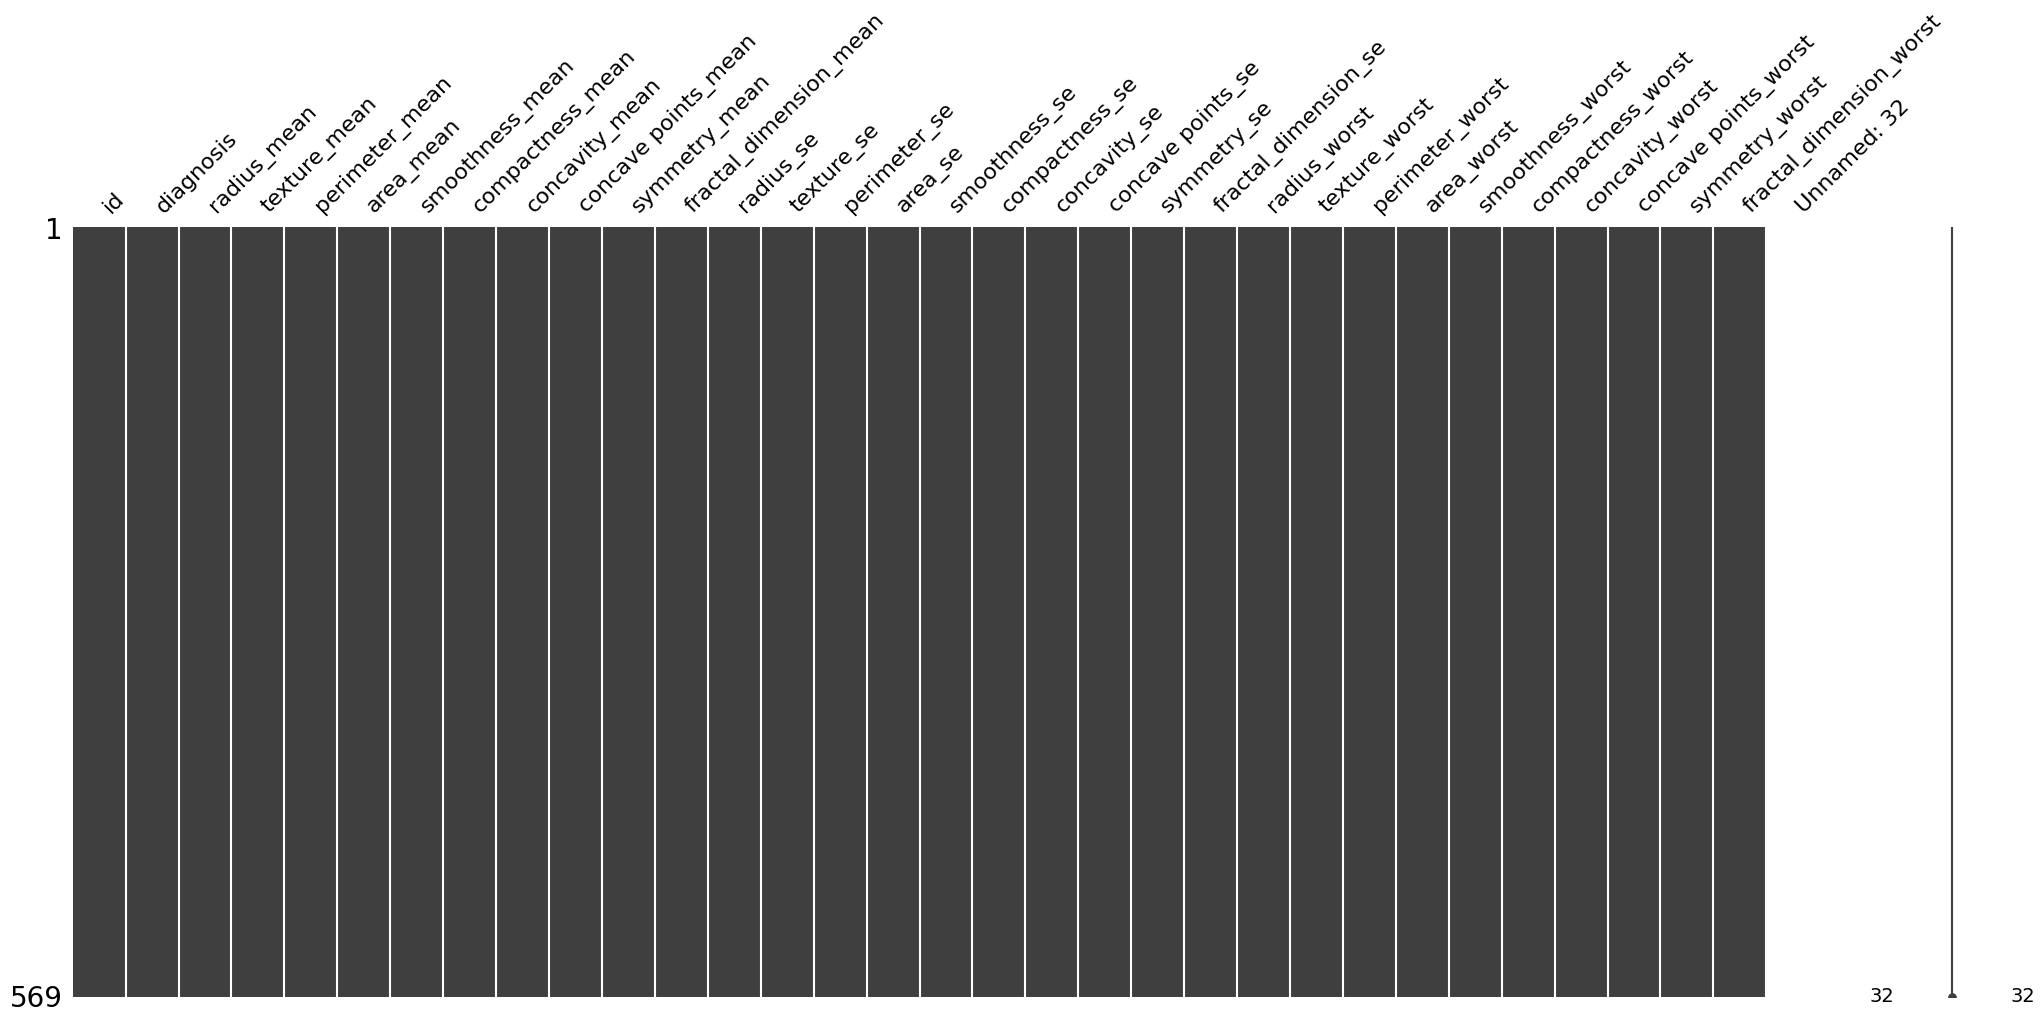

In [ ]:
import missingno as msno
msno.matrix(df)

пропусков нет


Разделение данных перед EDA

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.50, random_state = 42, stratify=y)

In [ ]:
X_tr.shape, X_tst.shape

((284, 30), (285, 30))

In [ ]:
X_tr.reset_index(drop=True, inplace=True)
y_tr.reset_index(drop=True, inplace=True)
X_tst.reset_index(drop=True, inplace=True)
y_tst.reset_index(drop=True, inplace=True)

Распределение признаков

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

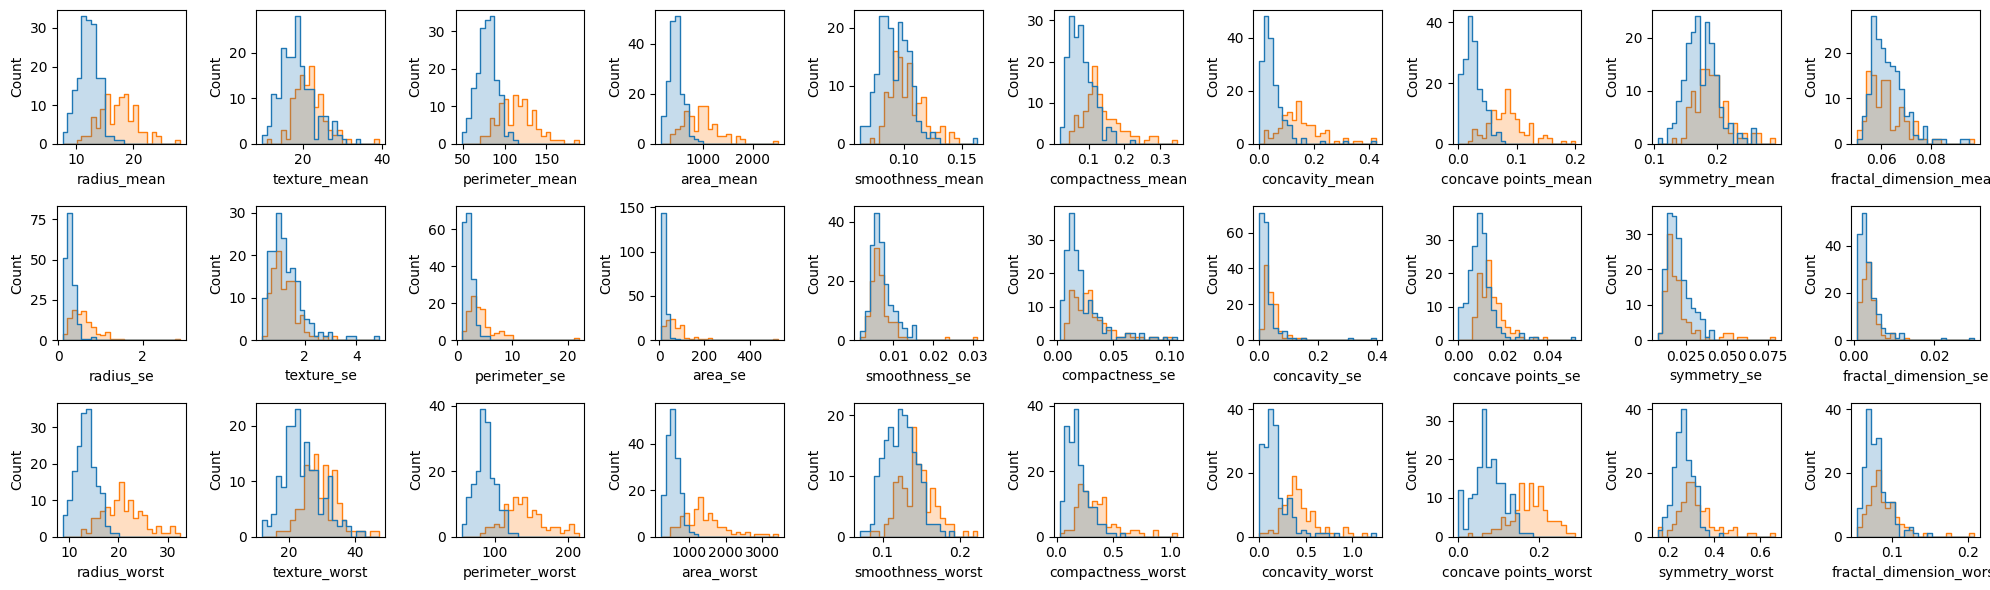

In [ ]:
fig, axes = plt.subplot_mosaic(X_tr.columns.values.reshape(3, 10), figsize=(20, 6))#матрица из лейблов 3X10
for col in X_tr.columns:
    sns.histplot(x=X_tr[col], hue=y_tr, bins=25, element='step', ax=axes[col])
    axes[col].get_legend().remove()
plt.tight_layout()

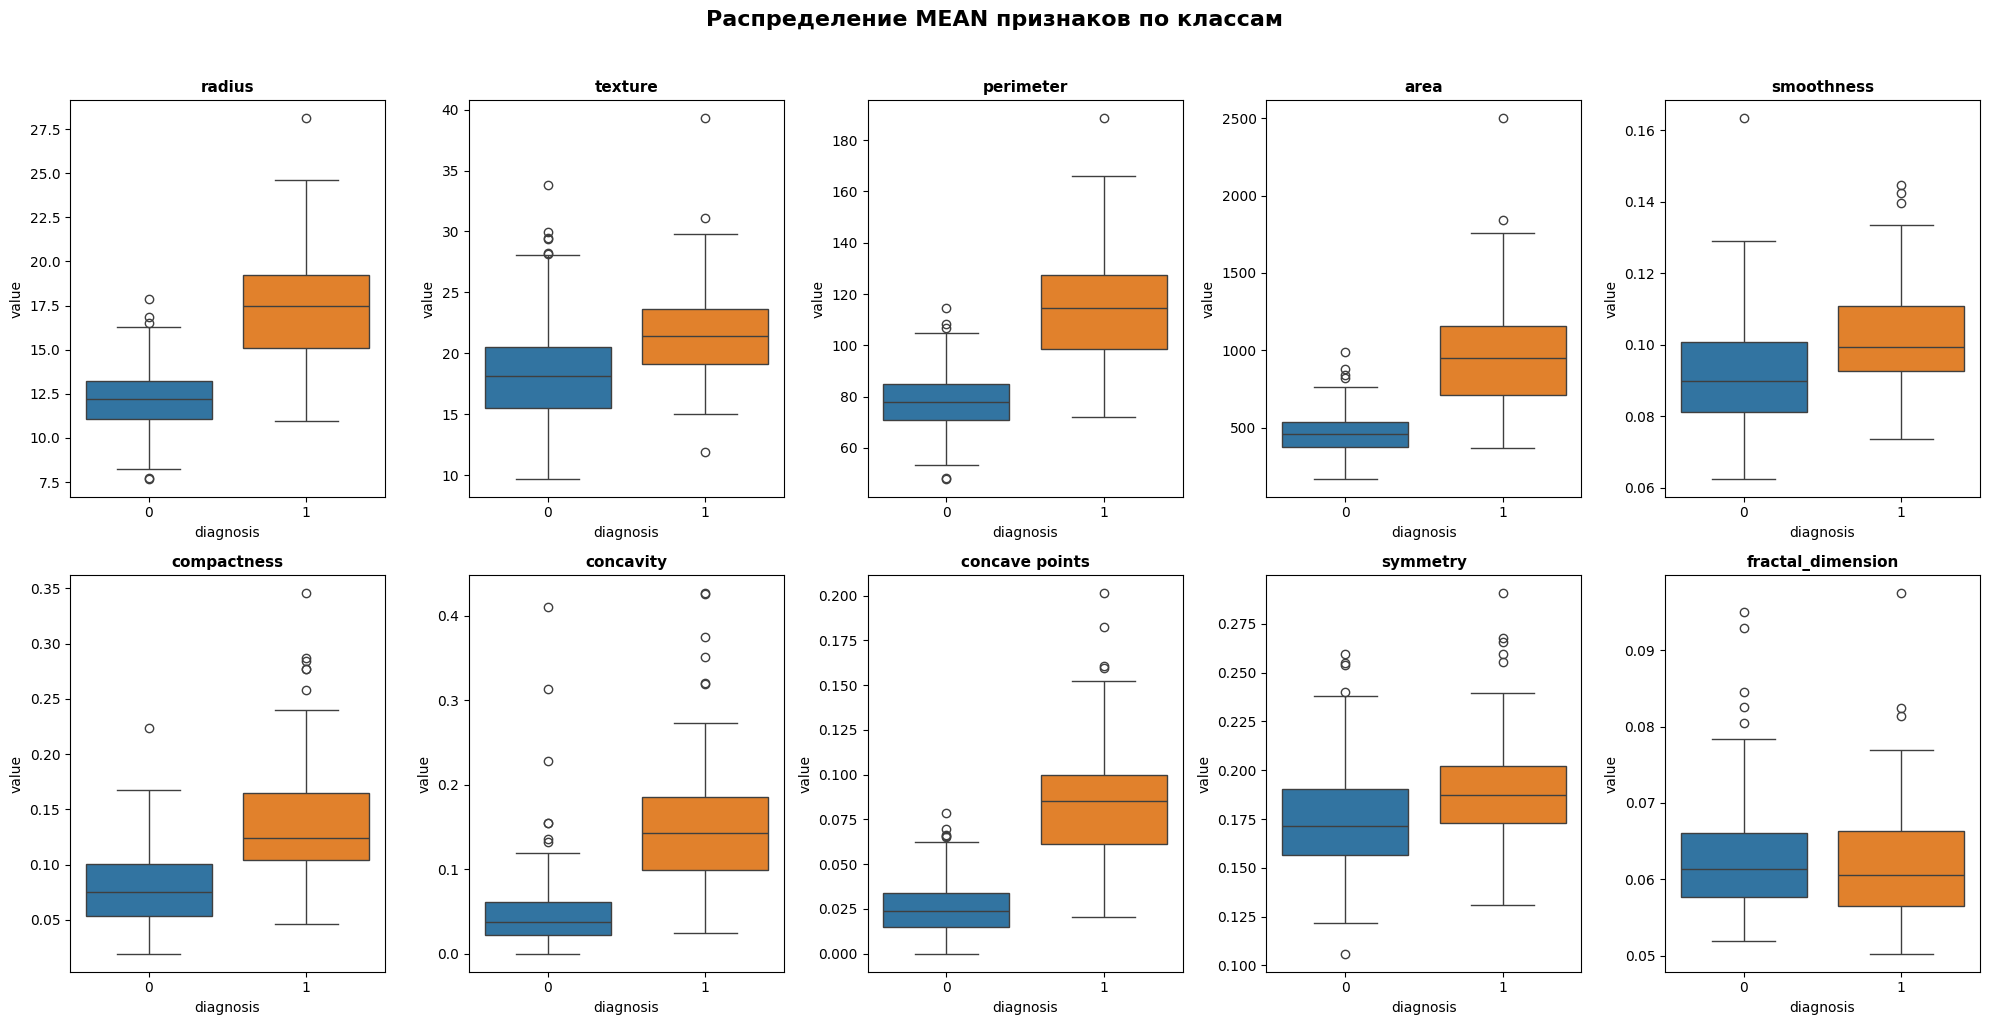

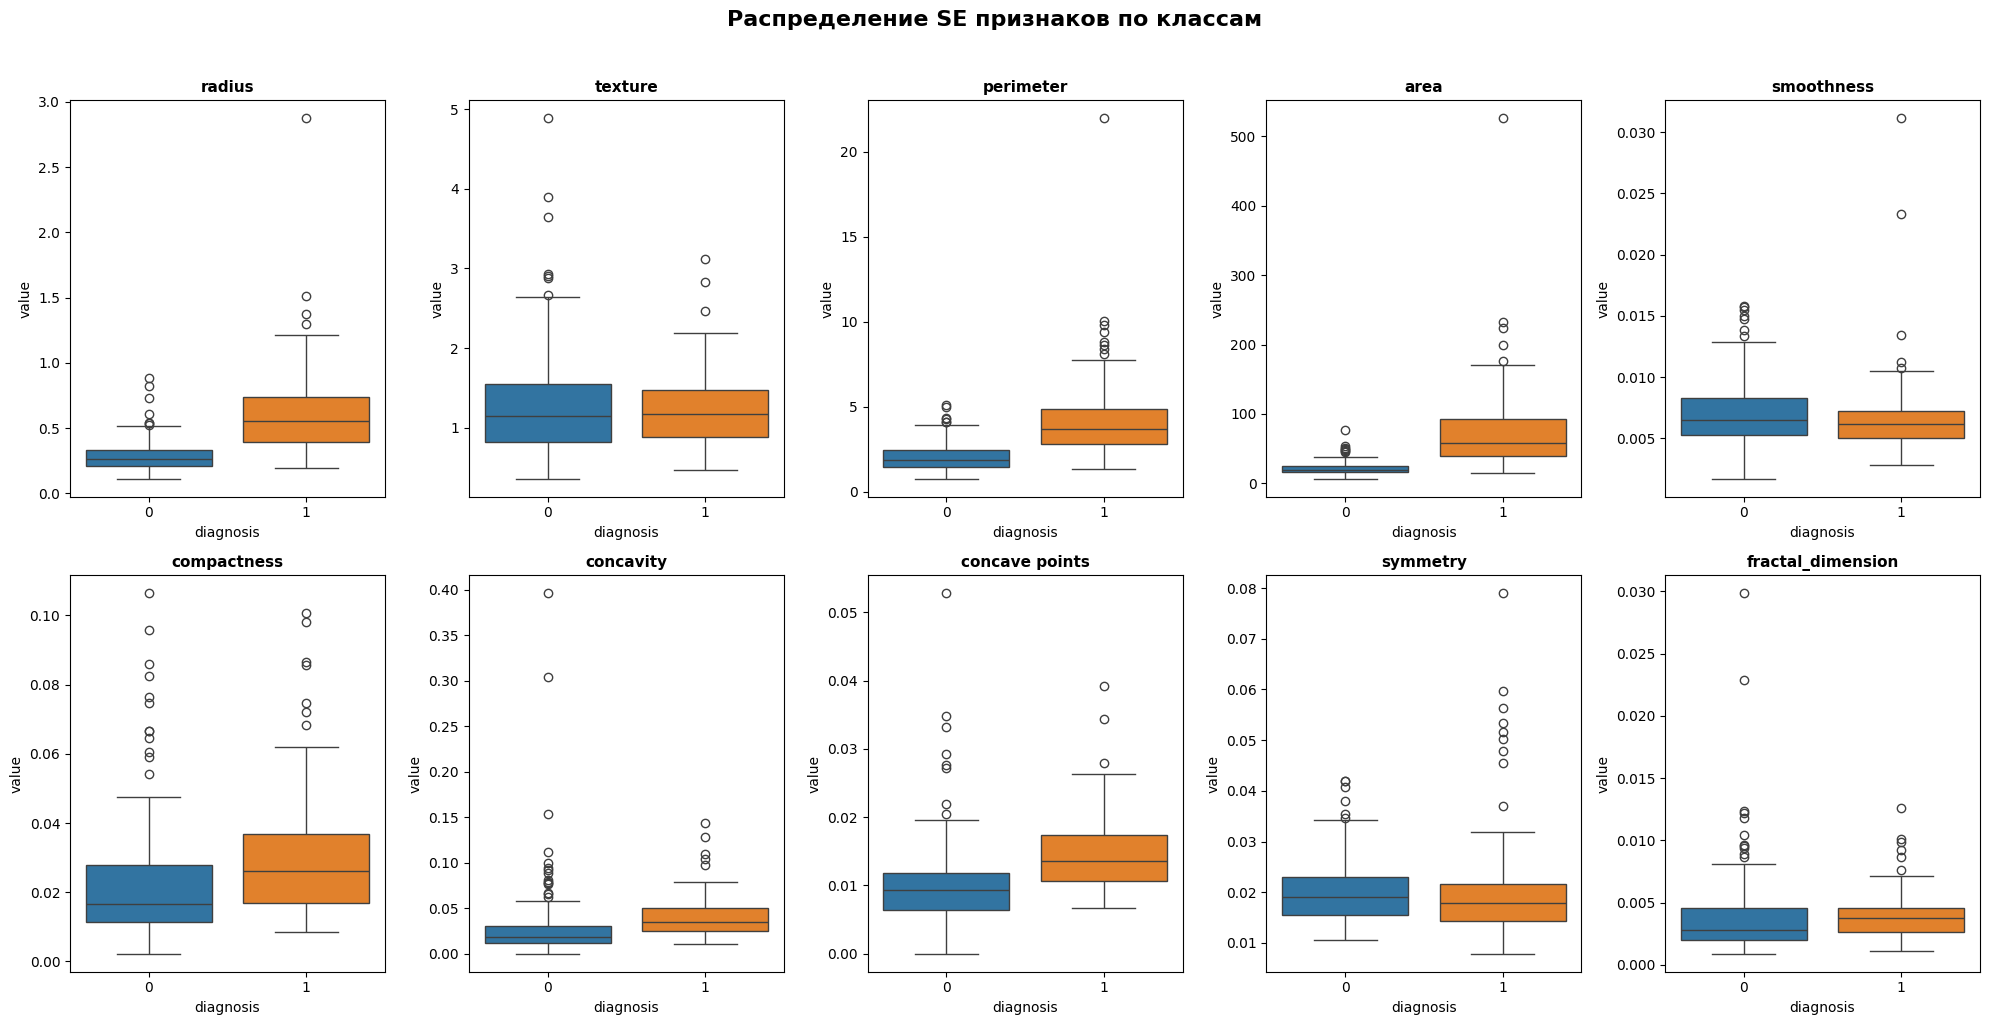

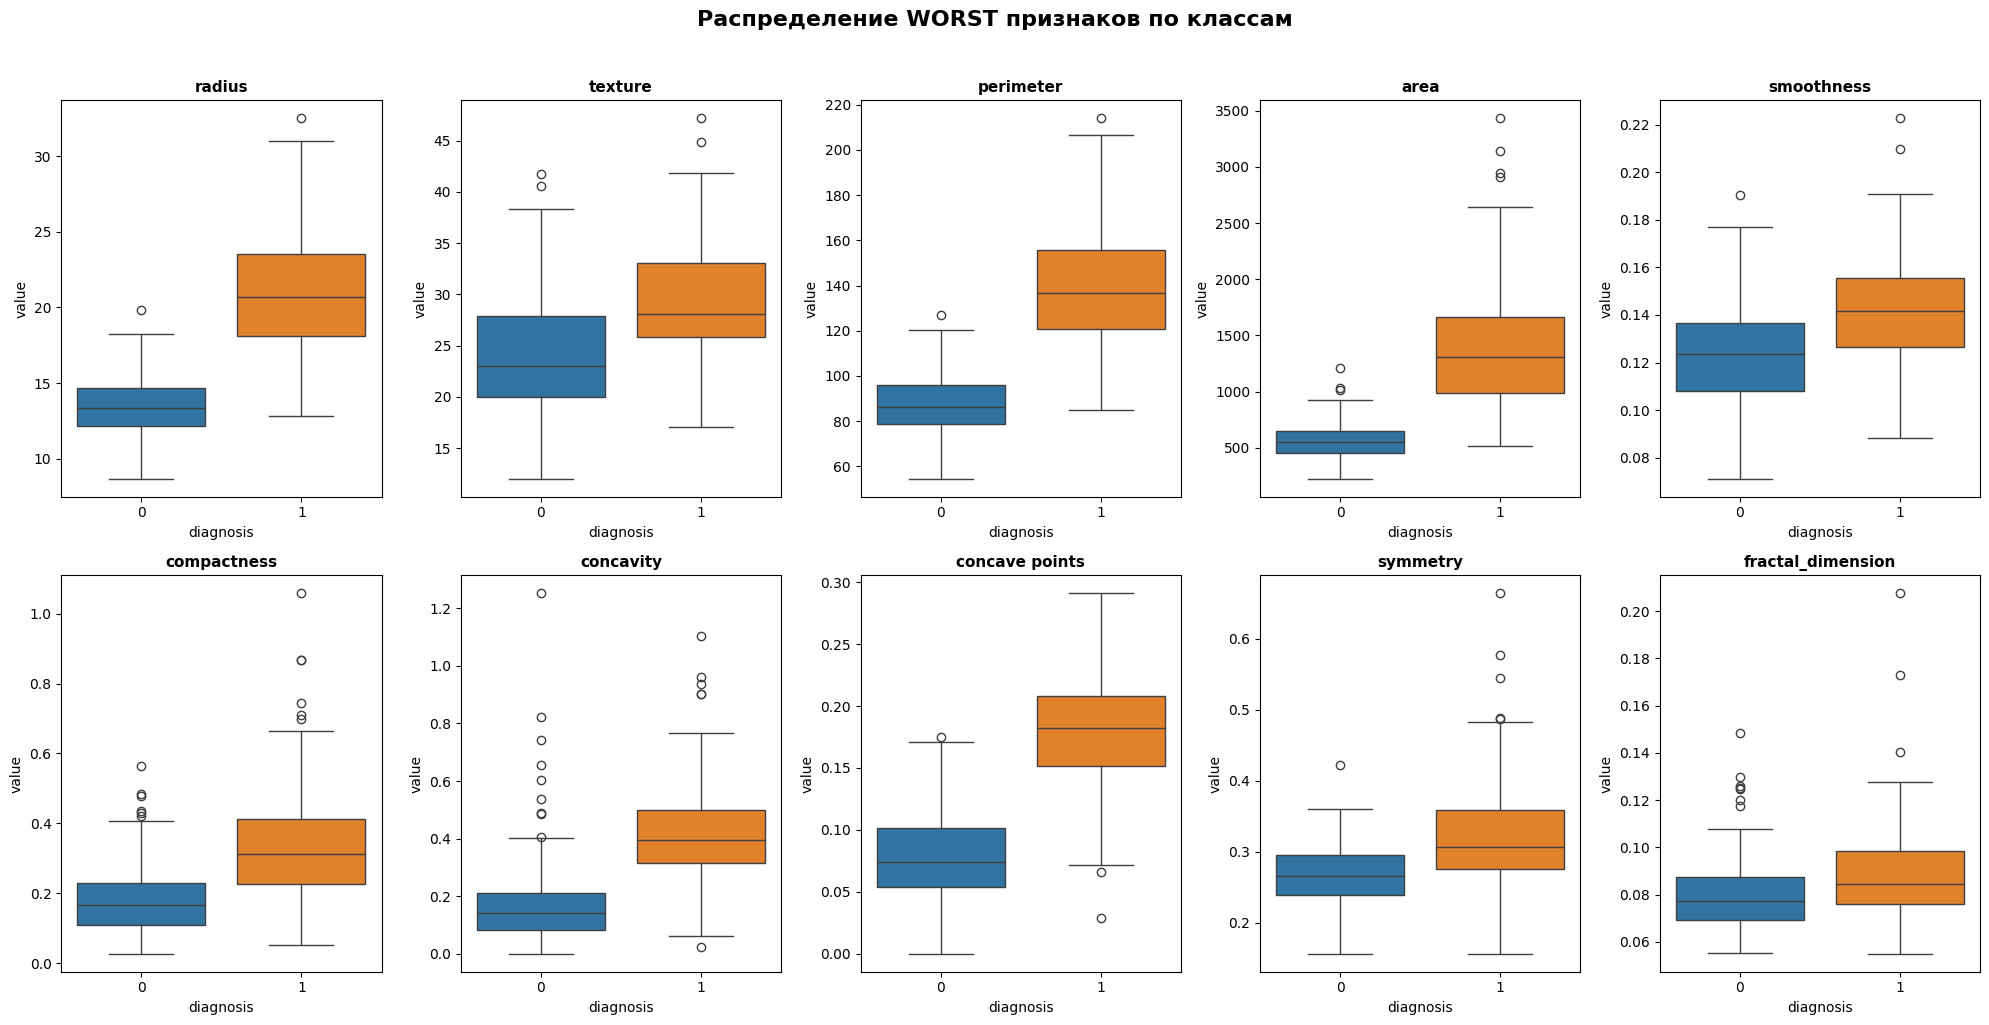

In [ ]:
feature_types = {
    'mean': [col for col in X_tr.columns if col.endswith('_mean')],
    'se': [col for col in X_tr.columns if col.endswith('_se')],
    'worst': [col for col in X_tr.columns if col.endswith('_worst')]
}

for feature_type, features in feature_types.items():#пары (mean,[список колонок])
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))#сетка 2x5
    axes = axes.ravel()#axes было матрицей, стало массив длина 10

    for idx, feature in enumerate(features):#(0, имя колонки)
        plot_data = pd.DataFrame({
            'value': X_tr[feature],
            'diagnosis': y_tr
        })
        # sns.violinplot(data=plot_data,
        #                x="diagnosis",
        #                y="value",
        #                hue="diagnosis",
        #                ax=axes[idx],
        #                legend=False,
        #                fill=False)
        sns.boxplot(data=plot_data,
                    x='diagnosis',
                    y='value',
                    hue='diagnosis',
                    ax=axes[idx],
                    legend=False)
        short_name = feature.replace(f'_{feature_type}', '')
        axes[idx].set_title(short_name, fontweight='bold', fontsize=11)

    for idx in range(len(features), 10):
        axes[idx].set_visible(False)

    plt.suptitle(f'Распределение {feature_type.upper()} признаков по классам',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
PowerTransformer().get_params()

{'copy': True, 'method': 'yeo-johnson', 'standardize': True}

In [ ]:
scaler = Pipeline([
    ('powert', PowerTransformer()),#сюда уже включена стандартизация и method="yeo-johnson"
])
scaler.fit(X_tr)
X_tr_norm = pd.DataFrame(scaler.transform(X_tr), columns=X_tr.columns)
X_tst_norm = pd.DataFrame(scaler.transform(X_tst), columns=X_tst.columns)

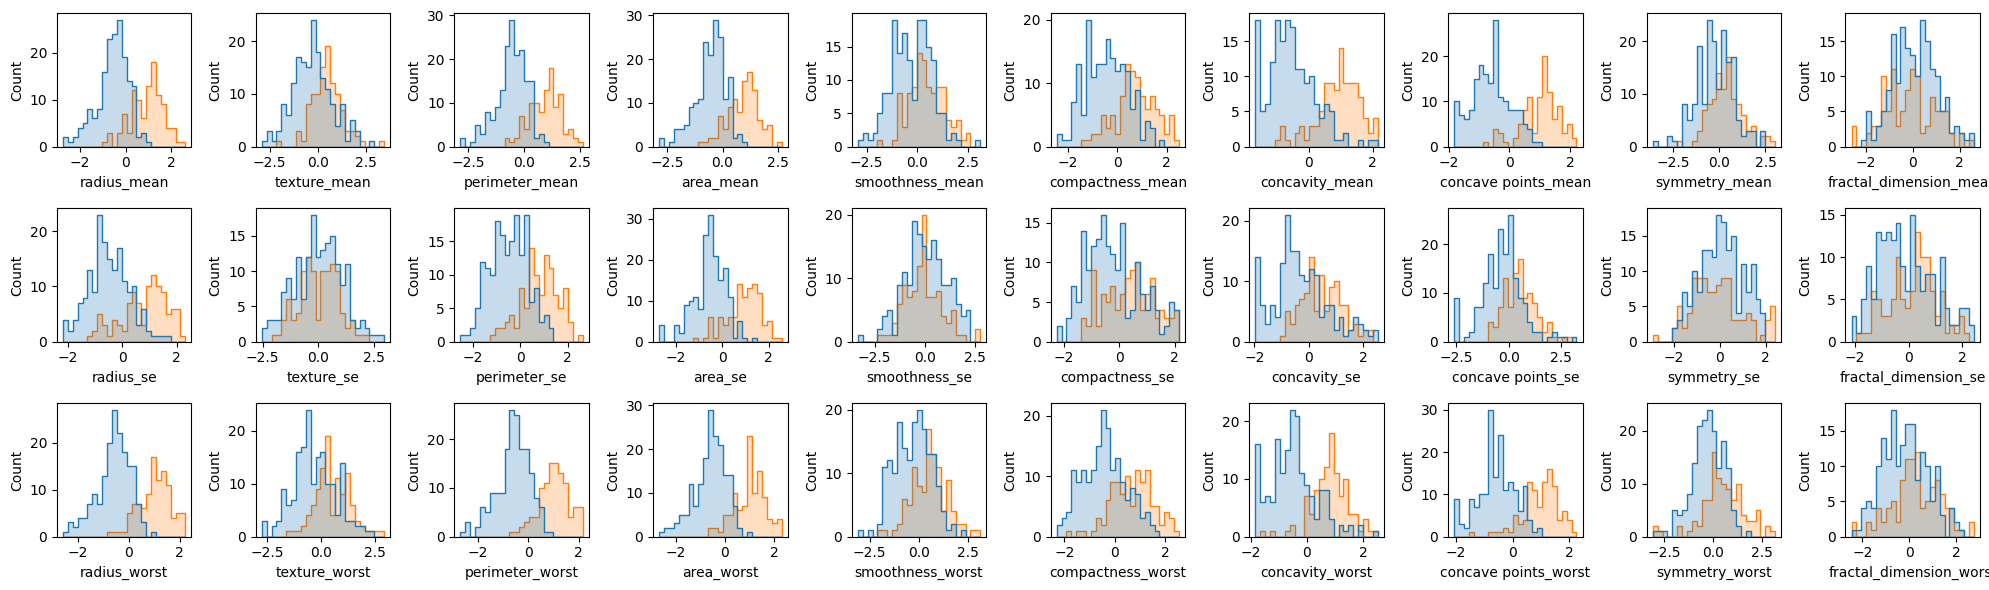

In [ ]:
fig, axes = plt.subplot_mosaic(X_tr_norm.columns.values.reshape(3, 10), figsize=(20, 6))
for col in X_tr_norm.columns:
    sns.histplot(x=X_tr_norm[col], hue=y_tr, bins=25, element='step', ax=axes[col])
    axes[col].get_legend().remove()
plt.tight_layout()

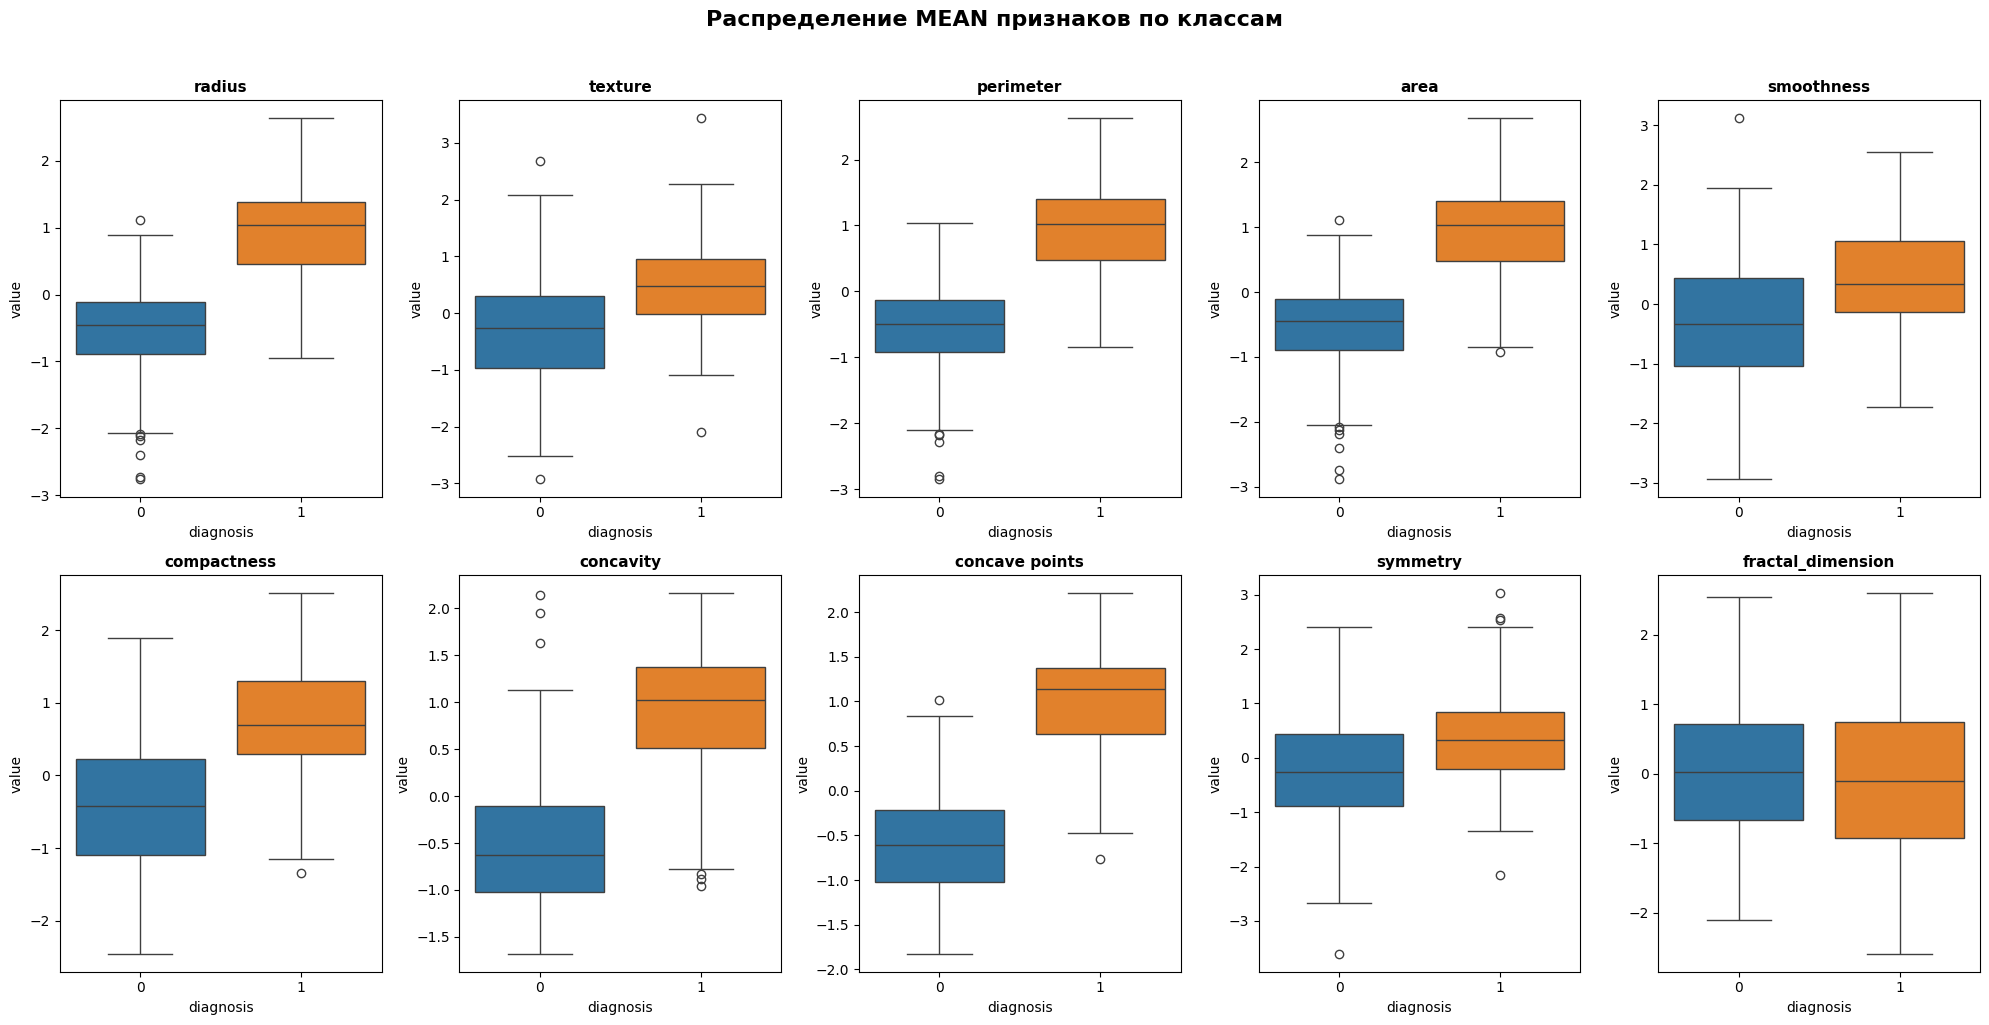

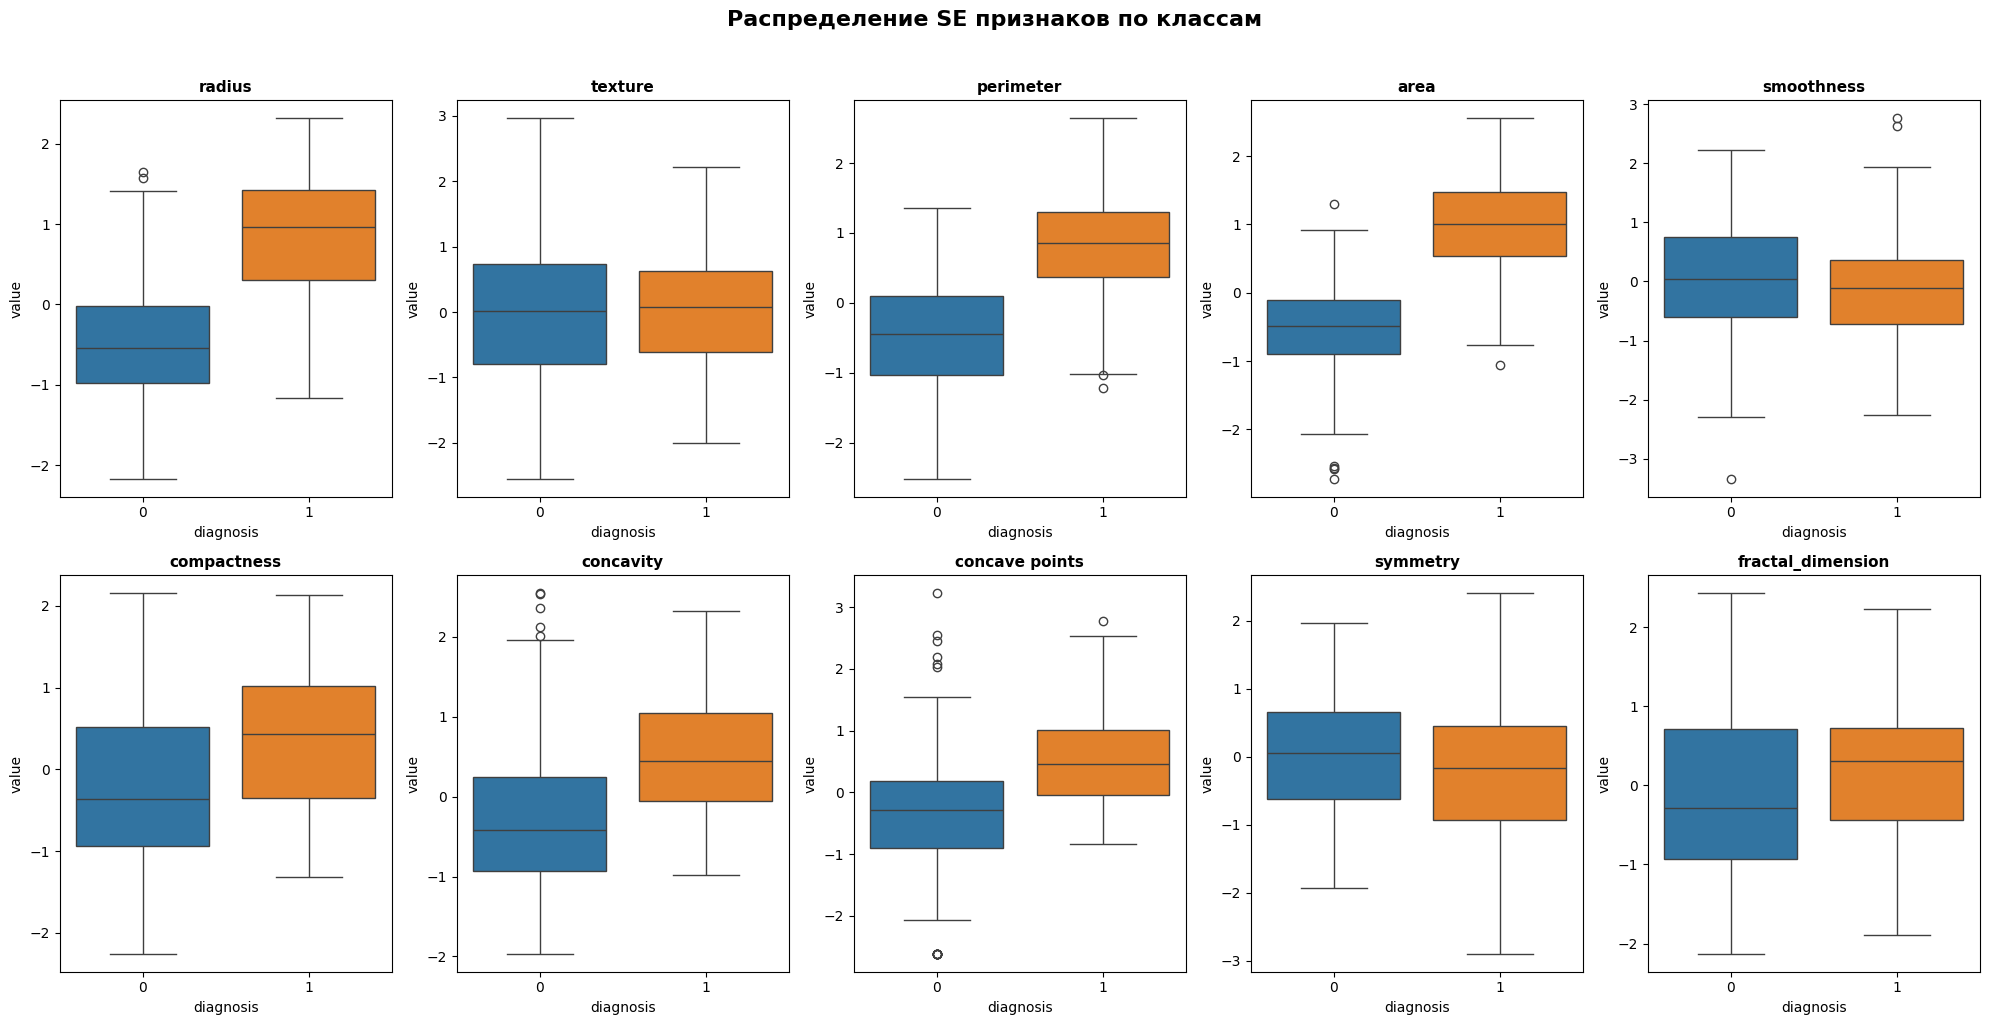

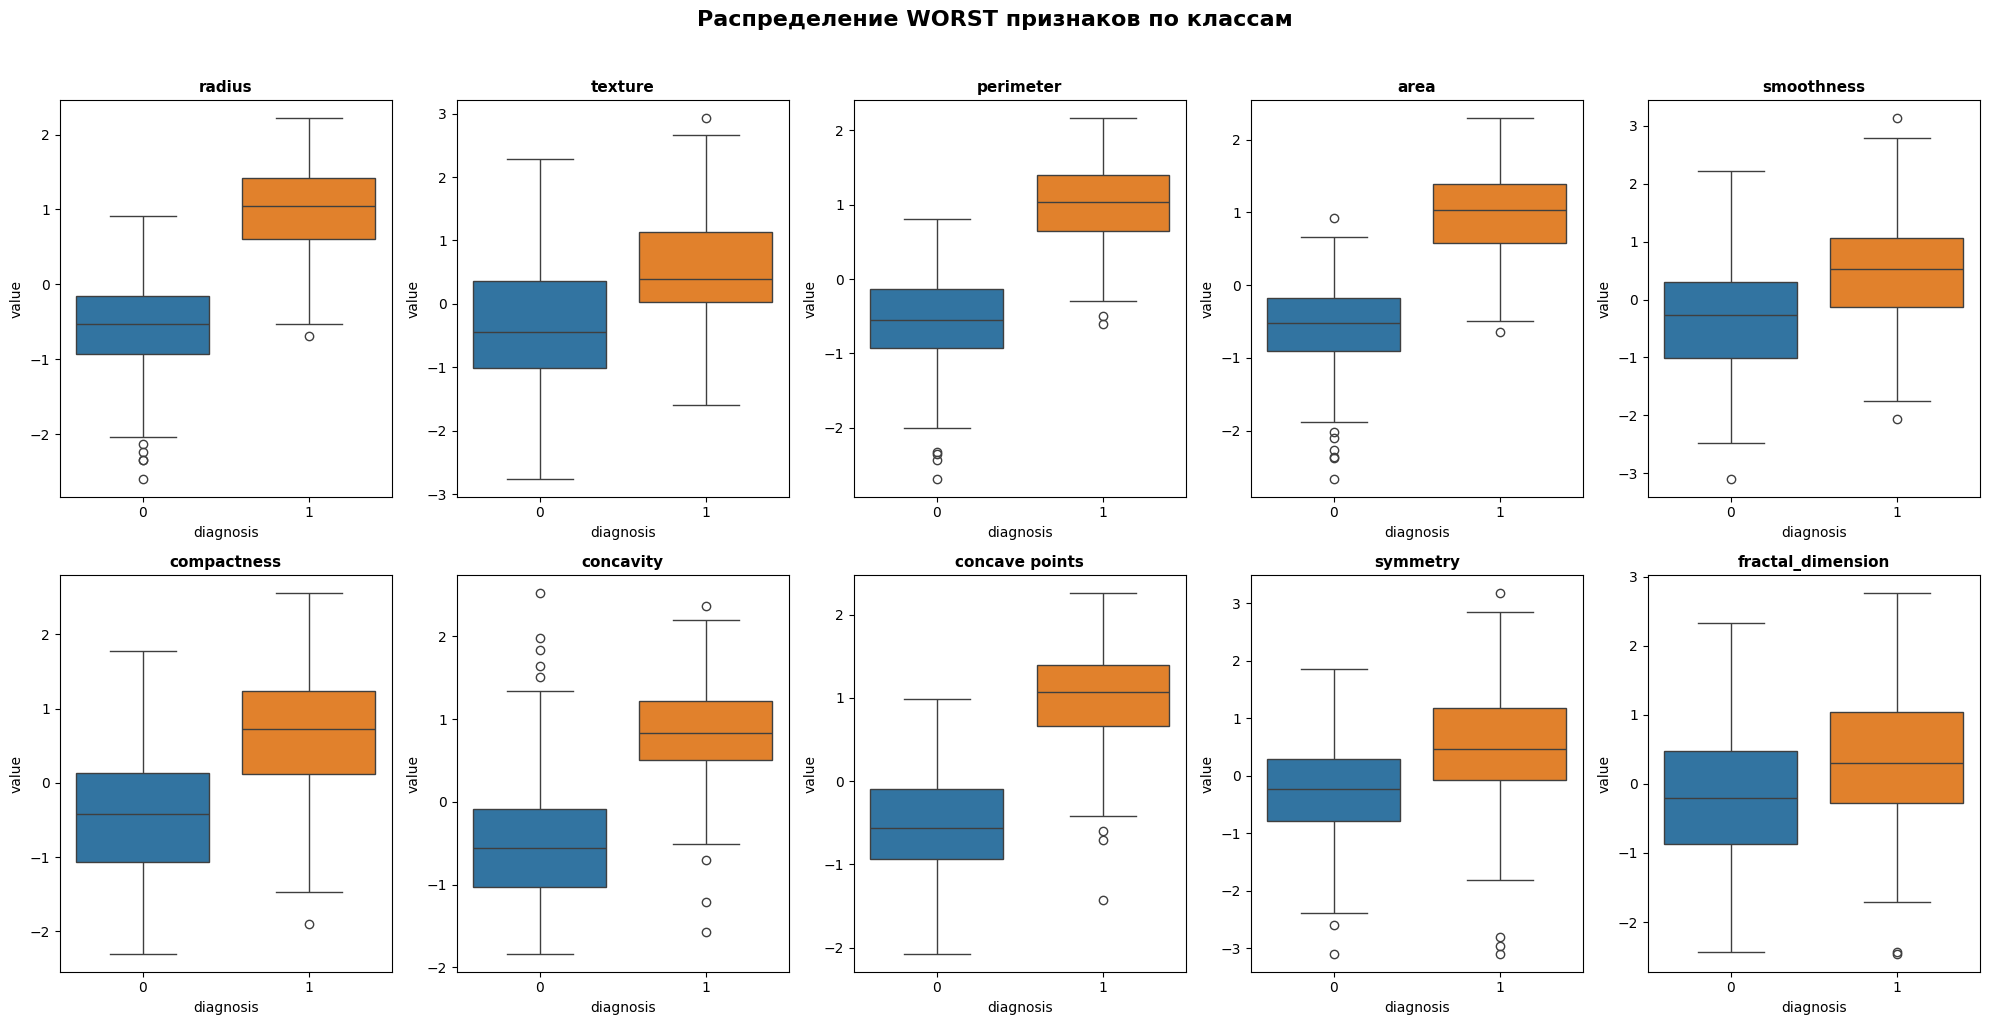

In [ ]:
feature_types = {
    'mean': [col for col in X_tr_norm.columns if col.endswith('_mean')],
    'se': [col for col in X_tr_norm.columns if col.endswith('_se')],
    'worst': [col for col in X_tr_norm.columns if col.endswith('_worst')]
}
colors = {'B': '#90EE90', 'M': '#FFB6C1'}

for feature_type, features in feature_types.items():
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.ravel()
    for idx, feature in enumerate(features):
        plot_data = pd.DataFrame({
            'value': X_tr_norm[feature],
            'diagnosis': y_tr
        })
        # sns.violinplot(data=plot_data,
        #                x="diagnosis",
        #                y="value",
        #                hue="diagnosis",
        #                ax=axes[idx],
        #                legend=False,
        #                fill=False)
        sns.boxplot(data=plot_data, x='diagnosis', y='value', hue='diagnosis',ax=axes[idx], legend=False)

        short_name = feature.replace(f'_{feature_type}', '')
        axes[idx].set_title(short_name, fontweight='bold', fontsize=11)

    for idx in range(len(features), 10):
        axes[idx].set_visible(False)

    plt.suptitle(f'Распределение {feature_type.upper()} признаков по классам',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

EDA

тепловая карта


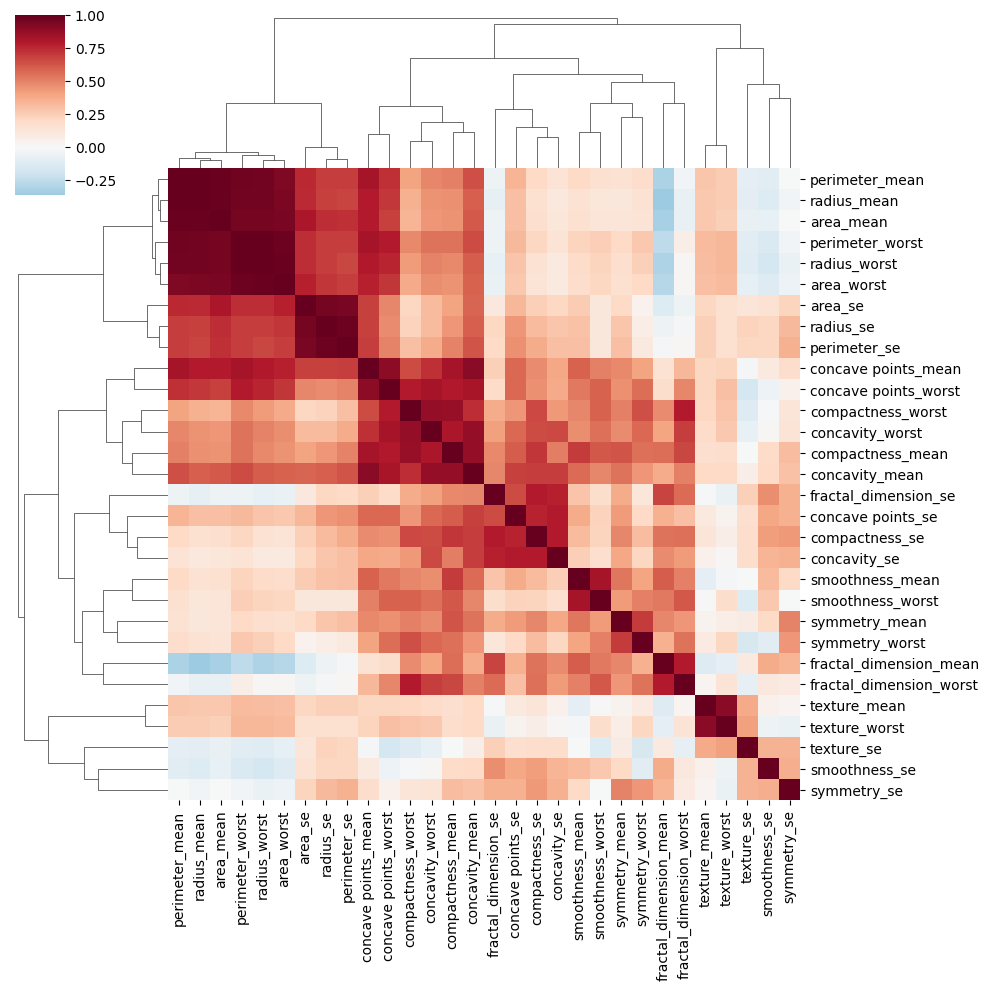

In [ ]:
sns.clustermap(X_tr.corr(method='pearson'), cmap='RdBu_r', center=0)

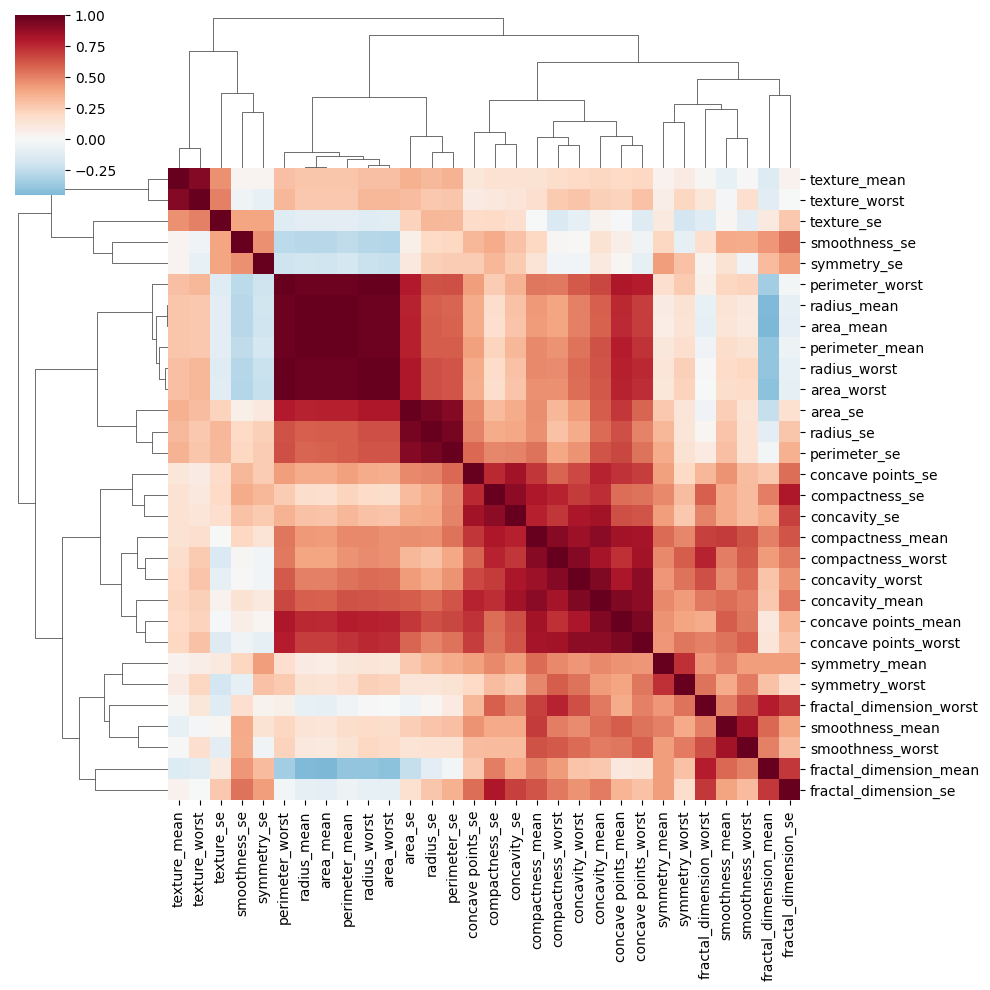

In [ ]:
sns.clustermap(X_tr_norm.corr(method='pearson'), cmap='RdBu_r', center=0)

In [ ]:
import scipy as sp

In [ ]:
import numpy as np

In [ ]:
(b, benign), (m, malignant) = X_tr_norm.groupby(y_tr)
assert b == 0 and m == 1 #Проверка, что 0 — benign, 1 — malignant
ttest = sp.stats.ttest_ind(benign, malignant, axis=0)
diffs = X_tr_norm.groupby(y_tr).mean()
diff_df = pd.DataFrame({'T': ttest.statistic,
                        'P': ttest.pvalue,
                        'neglogP': -np.log10(ttest.pvalue),
                        'difference': (diffs.iloc[1] - diffs.iloc[0])}).sort_values(by=['neglogP'], ascending=False)

In [ ]:
diff_df

,T,P,neglogP,difference
concave points_mean,-20.767463,9.109546e-59,58.040503,1.607706
perimeter_worst,-20.595834,3.744784e-58,57.426573,1.602413
radius_worst,-20.237265,7.234612e-57,56.140585,1.591096
area_worst,-20.130830,1.745758e-56,55.758016,1.587668
concave points_worst,-19.051790,1.380604e-52,51.859931,1.551034
perimeter_mean,-17.792797,5.295662e-48,47.276080,1.503617
area_mean,-17.165577,1.038779e-45,44.983477,1.477934
radius_mean,-17.100136,1.802634e-45,44.744092,1.475171
area_se,-16.820234,1.905532e-44,43.719984,1.463167
concavity_mean,-16.406161,6.240372e-43,42.204789,1.444850


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_score

In [ ]:
df_res = pd.DataFrame()

In [ ]:
def calculate_classification_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {}

    metrics['balanced_accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred, average='binary', zero_division=0)
    metrics['precision'] = precision_score(y_true, y_pred, average='binary', zero_division=0)
    metrics['f1_score'] = f1_score(y_true, y_pred, average='binary', zero_division=0)
    metrics['accuracy'] = np.mean(y_true == y_pred)

    if y_pred_proba is not None:
        if y_pred_proba.ndim == 1:
            metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
        else:
            metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba[:, 1])
    else:
        metrics['roc_auc'] = None

    cm = confusion_matrix(y_true, y_pred)

    return metrics, cm

In [ ]:
clf = SGDClassifier(loss='log_loss', penalty=None)
scores = cross_val_score(clf, X_tr, y_tr, cv=5, scoring='roc_auc')

print(f"Scores per fold: {scores}")
print(f"Average accuracy: {scores.mean()}")

Scores per fold: [0.90649351 0.91534392 0.95238095 0.93518519 0.93061224]
Average accuracy: 0.9280031608603035


In [ ]:
clf = Pipeline([
    ('pca', PCA(n_components=5)),
    ('logreg', SGDClassifier(loss='log_loss', penalty=None)),
])
scores = cross_val_score(clf, X_tr, y_tr, cv=5, scoring='roc_auc')

print(f"Scores per fold: {scores}")
print(f"Average accuracy: {scores.mean()}")

Scores per fold: [0.98701299 0.9973545  0.92328042 0.93650794 0.97414966]
Average accuracy: 0.963661100803958


In [ ]:
from sklearn.metrics import roc_auc_score

clf = SGDClassifier(loss='log_loss', penalty=None)
clf.fit(X_tr_norm, y_tr)
y_pred_tst = clf.predict(X_tst_norm)
y_pred_tst_proba = clf.predict_proba(X_tst_norm)[:, 1]
metrics, cm = calculate_classification_metrics(y_tst, y_pred_tst, y_pred_tst_proba)
metrics

{'balanced_accuracy': np.float64(0.9624486138926953),
 'recall': 0.9528301886792453,
 'precision': 0.9528301886792453,
 'f1_score': 0.9528301886792453,
 'accuracy': np.float64(0.9649122807017544),
 'roc_auc': np.float64(0.9935965004743333)}

In [ ]:
df_res = pd.DataFrame(metrics, index=['LogReg_base'])
df_res

,balanced_accuracy,recall,precision,f1_score,accuracy,roc_auc
LogReg_base,0.962449,0.95283,0.95283,0.95283,0.964912,0.993597


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

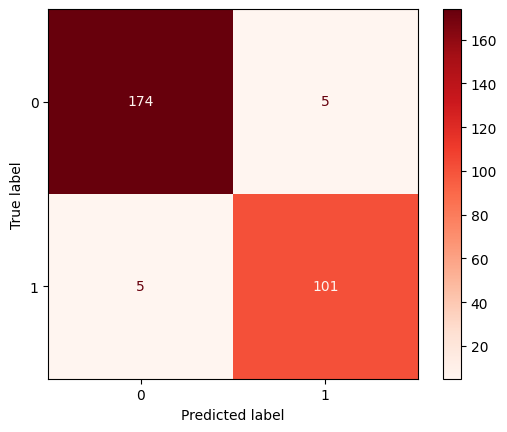

In [ ]:
ConfusionMatrixDisplay(cm).plot(cmap='Reds')

In [ ]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2)
X_tr_pls, _ = pls.fit_transform(X_tr_norm, y_tr)
X_tst_pls = pls.transform(X_tst_norm)

clf = SGDClassifier(loss='log_loss', penalty=None, random_state=42)
clf.fit(X_tr_pls, y_tr)
y_pred_tst = clf.predict(X_tst_pls)
y_pred_tst_proba = clf.predict_proba(X_tst_pls)[:, 1]
metrics, cm = calculate_classification_metrics(y_tst, y_pred_tst, y_pred_tst_proba)
df_res = pd.concat([df_res,pd.DataFrame(metrics, index=['LogReg_PLS'])])
df_res

,balanced_accuracy,recall,precision,f1_score,accuracy,roc_auc
LogReg_base,0.962449,0.952830,0.952830,0.952830,0.964912,0.993597
LogReg_PLS,0.981317,0.990566,0.954545,0.972222,0.978947,0.998893


In [ ]:
clf.coef_

array([[ 6.09975933, -2.4266704 ]])

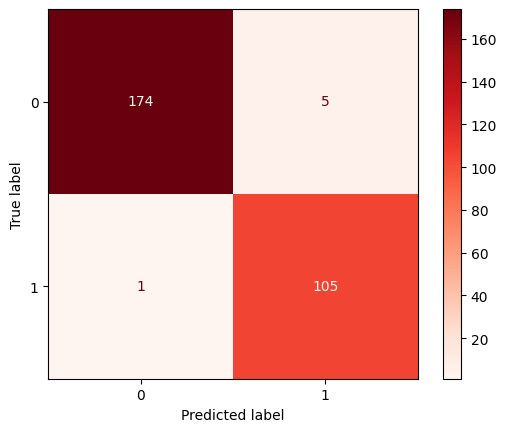

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_tst, y_pred_tst > 0.5)).plot(cmap='Reds')

нам в этом датасете важна метрика recall, потому что надо не пропустить больных раком

recall 0.99

<Axes: >

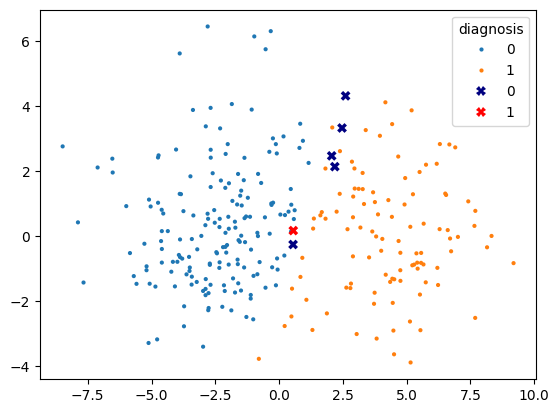

In [ ]:
y_pred_tst_cl = y_pred_tst > 0.5
sns.scatterplot(x=X_tst_pls[y_tst == y_pred_tst_cl, 0], y=X_tst_pls[y_tst == y_pred_tst_cl, 1], hue=y_tst[y_tst == y_pred_tst_cl], marker='.', lw=0)
sns.scatterplot(x=X_tst_pls[y_tst != y_pred_tst_cl, 0], y=X_tst_pls[y_tst != y_pred_tst_cl, 1], hue=y_tst[y_tst != y_pred_tst_cl], palette=["navy", "red"], marker='X', s=50, lw=0)

здесь можно посмотреть эти точки, которые неправильно распознались и увидеть что все они лежат на плоскости пересечения